In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Connect to SQLite database

In [2]:
connection = sqlite3.connect("sales_data.db")
cursor = connection.cursor()

## Create the sales table

In [3]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER,
    price REAL,  -- Price in INR
    currency TEXT DEFAULT 'INR'
)
''')

## Insert sample data

In [4]:
sample_data = [
    ("Apple", 10, 20.0, "INR"),
    ("Banana", 5, 5.0, "INR"),
    ("Apple", 7, 20.0, "INR"),
    ("Orange", 8, 15.0, "INR"),
    ("Banana", 12, 5.0, "INR"),
    ("Orange", 4, 15.0, "INR"),
]

cursor.executemany("INSERT INTO sales (product, quantity, price, currency) VALUES (?, ?, ?, ?)", sample_data)
connection.commit()

In [5]:
## Query the data from sqlite table
cursor.execute('Select * from sales')
rows=cursor.fetchall()
for row in rows:
  print(row)

(1, 'Apple', 10, 20.0, 'INR')
(2, 'Banana', 5, 5.0, 'INR')
(3, 'Apple', 7, 20.0, 'INR')
(4, 'Orange', 8, 15.0, 'INR')
(5, 'Banana', 12, 5.0, 'INR')
(6, 'Orange', 4, 15.0, 'INR')


## Query total quantity and revenue per product

In [6]:
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS total_revenue
FROM
    sales
GROUP BY
    product
'''

## Load query result into pandas DataFrame

In [7]:
df = pd.read_sql_query(query, connection)

## Print the results

In [8]:
print("Sales Summary (Currency: INR ₹):\n")
print(df)

Sales Summary (Currency: INR ₹):

  product  total_qty  total_revenue
0   Apple         17          340.0
1  Banana         17           85.0
2  Orange         12          180.0


## Plot a bar chart

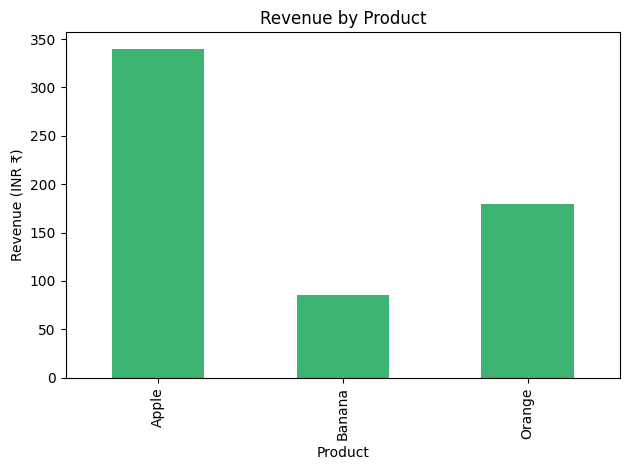

In [10]:
df.plot(kind='bar', x='product', y='total_revenue', legend=False, color='mediumseagreen')
plt.title("Revenue by Product")
plt.ylabel("Revenue (INR ₹)")
plt.xlabel("Product")
plt.tight_layout()

plt.savefig("sales_chart_inr.png")
plt.show()

## Close the database connection

In [13]:
connection.close()